<a href="https://colab.research.google.com/github/vickypandey07/Ted-Talk-Views-Prediction/blob/main/Ted_Talk_Views_Prediction_Vikram_Pandey_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**
---
###**Dataset Information**
* Number of instances: 4,005
* Number of attributes: 19
---
###**Features information:**
###The dataset contains features like:

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk
---
###**Target Variable :**
* **'views'**: Count of views
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset and creating dataframe
df = pd.read_csv('/content/drive/MyDrive/data_ted_talks.csv')

# Firstly i do some Exploratory Data Analysis.

In [4]:
#Here checking the basic info about the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o



## .   It is found that, we have only 4 numerical columns and rest all columns are either categorical or they contains textual data in our dataset,.
## .   Out of 4 numerical columns, 1 is target variable.

# .Threrfore, we need to create some numerical columns from columns of object dtype.



In [5]:
 #first 10 rows of dataset using head()
 df.head(10)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
5,49,Behind the design of Seattle's library,Joshua Prince-Ramus,{0: 'Joshua Prince-Ramus'},{0: ['architect']},{0: 'Joshua Prince-Ramus is best known as arch...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,I'm going to present three projects in rapid f...
6,86,Letting go of God,Julia Sweeney,{0: 'Julia Sweeney'},"{0: ['actor', 'comedian', 'playwright']}",{0: 'Julia Sweeney creates comedic works that ...,4636596,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,When two young Mormon missionaries knock on Ju...,"On September 10, the morning of my seventh bir..."
7,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,{0: 'Dan Dennett'},"{0: ['philosopher', 'cognitive scientist']}",{0: 'Dan Dennett thinks that human consciousne...,3781244,2006-02-02,2006-07-18,TED2006,en,"['ar', 

In [6]:
#checking for the shape of dataset 
df.shape

(4005, 19)

In [7]:
#checking the Null Values in dataset
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

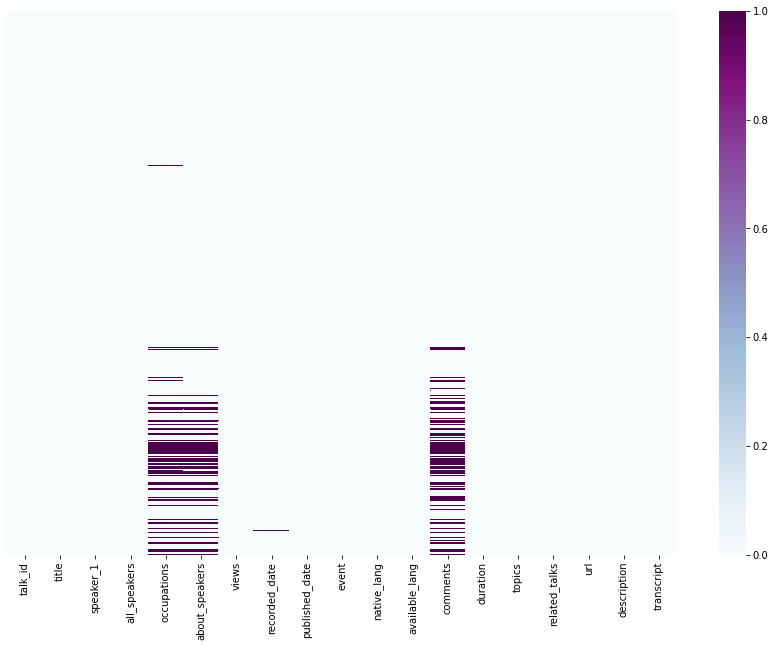

In [8]:
# Using heatmap to check missing data in dataset.

plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='BuPu')

In [9]:
# Now dropping url column as it is of no use.

df = df.drop(columns=['url'])

#Checking for duplicated rows.

In [10]:
df.duplicated().sum()

0

## As dataset does not contain any duplicate rows,That's good

## Removing all_speakers, occupations, about_speakers,native_lang  columns from our dataset as they are not so important.

In [11]:
df = df.drop(['all_speakers', 'about_speakers','occupations','native_lang'], axis=1)

In [12]:
# Now Checking total null values once again.

df.isna().sum()

talk_id             0
title               0
speaker_1           0
views               0
recorded_date       1
published_date      0
event               0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
description         0
transcript          0
dtype: int64

# **Let's do some EDA on columns**

#Let's explore speaker_1 column

**Speaker of top 10 most watched video**

In [13]:
#Extarcting the records of top 10 most viewed videos
df_pop=df.nlargest(10, ['views'])
df_pop[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


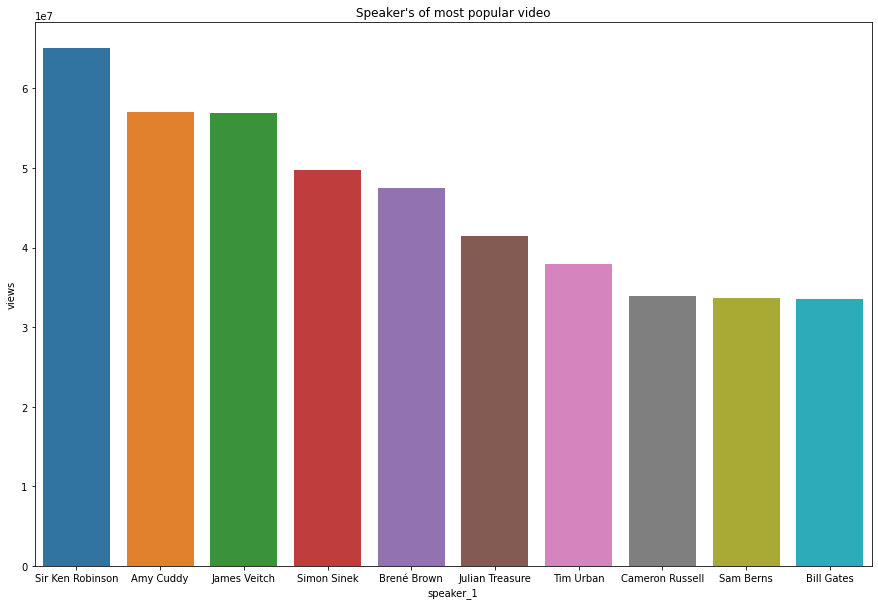

In [14]:
#top 10 most popular vidoes bar plot
plt.figure(figsize=(15,10))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=df_pop)

* **Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk video.**


##**Let's explore the event column**

**Checking the most frequent event category**

In [15]:
#let's find the most frequent event categories
freq_event=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(5,['views'])
freq_event.reset_index(inplace=True)
freq_event

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84


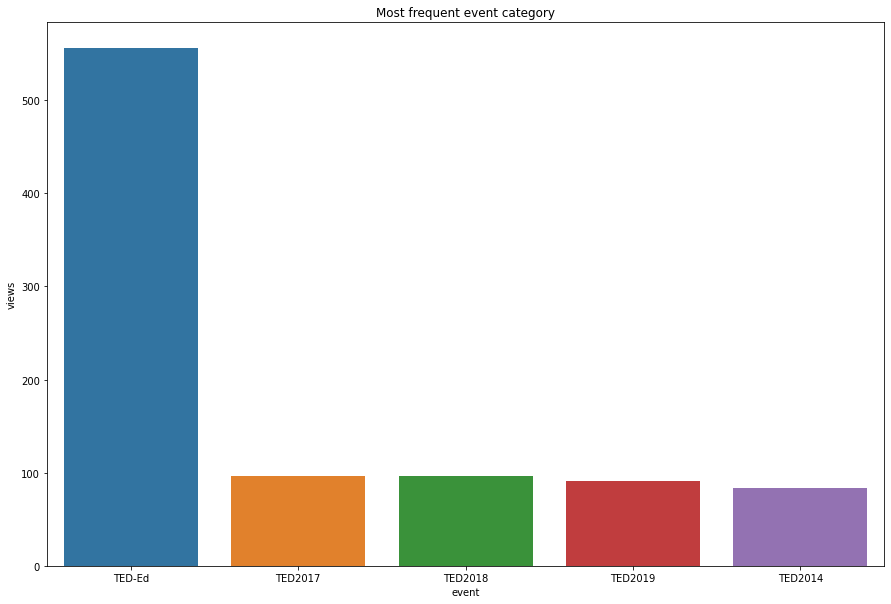

In [16]:
#Bar plot to show top 5 most frequent event category
plt.figure(figsize=(15,10))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event)

* **most frequent event category is TED-Ed**

#**Let's find most frequent words in title column.**

There are 157160 words in the combination of all titles.


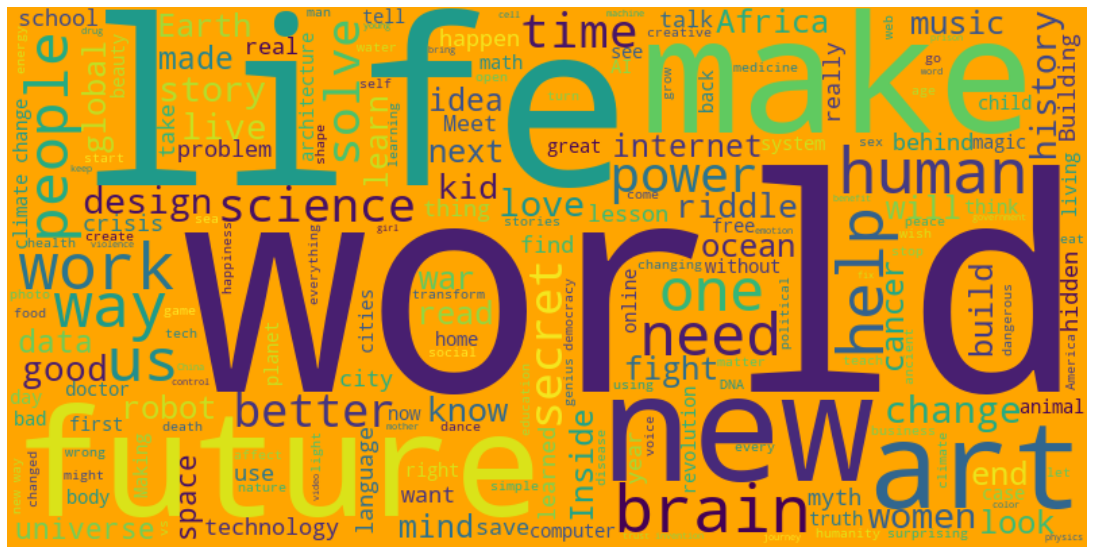

In [17]:
#ploting word cloud from title column
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="orange", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **Most of Titles contains words like life, world, future, art.** 

##**Exploring published_date column**

In [18]:
# Importing datetime library

import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [19]:
df['published_date']

0      2006-06-27
1      2006-06-27
2      2006-06-27
3      2006-06-27
4      2006-06-27
          ...    
4000   2020-04-27
4001   2020-04-27
4002   2020-04-28
4003   2020-04-30
4004   2020-04-30
Name: published_date, Length: 4005, dtype: datetime64[ns]

In [20]:
# Extracting publish day, month and year from the published_date column

df['publish_day'] = df['published_date'].apply(lambda x: x.weekday())
df['publish_month']=df['published_date'].apply(lambda x: x.month)
df['publish_year'] = df['published_date'].apply(lambda x: x.year)

## Here, extracting the  weekday, month and year and add three separate columns as:


*   publish_year
*   publish_month

*   publish_day





In [21]:
# Encoding of publish_day column with corresponding week day name

week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['publish_day']=df['publish_day'].map(week_day)

###**First explore publish_year column.**

In [22]:
#Here checking years having frequent release 
year_freq=df[['publish_year','views']].groupby('publish_year').agg({'views' : 'count'})
year_freq=year_freq.sort_values('views',ascending=False)
year_freq.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent publish years')

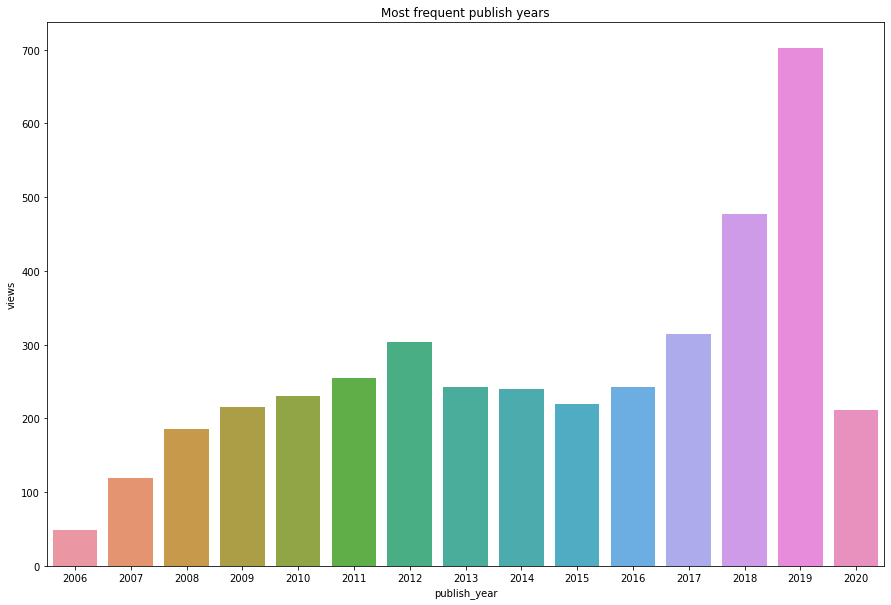

In [23]:
#Plotting the years having frequent release 
plt.figure(figsize=(15,10))
sns.barplot(x='publish_year',y='views',data=year_freq)
plt.title('Most frequent publish years')

* **In 2019 most of the videos has been published**

###**Now let's explore publish_month column**

In [24]:
# Encoding of publish_month column with corresponding month name
dict_month={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['publish_month']=df['publish_month'].map(dict_month)

In [26]:
# Checking for the most popular publish month according to average Views
pop_month=df[['publish_month','views']].groupby('publish_month').agg({'views' : 'mean'})
pop_month=pop_month.sort_values('views',ascending=False)
pop_month.reset_index(inplace=True)



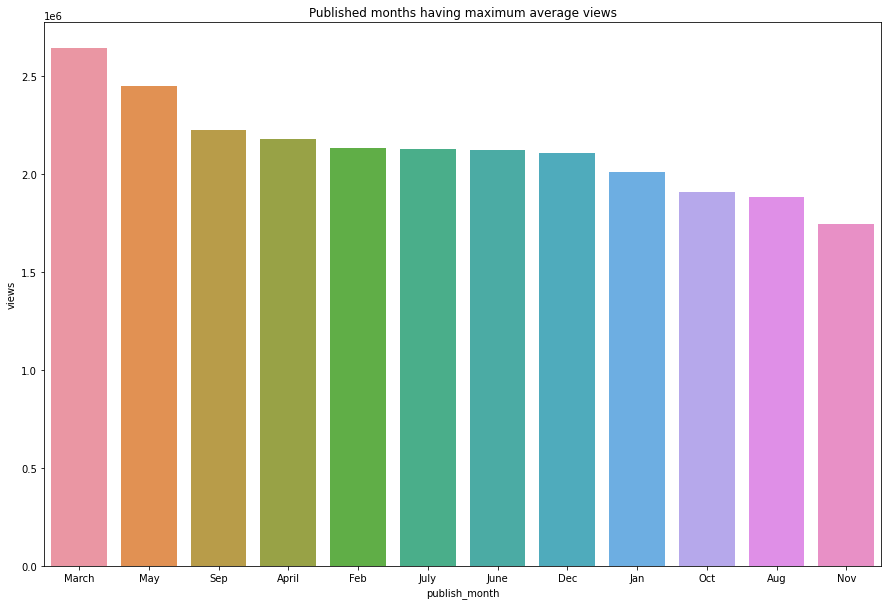

In [28]:
# Barplot showing months having maximum average views
plt.figure(figsize=(15,10))
plt.title('Published months having maximum average views')
sns.barplot(x='publish_month',y='views',data=pop_month)

* **Most popular videos are released in March**  

###**Exploring publish_day column.**

**Fisrtly checking for the most frequent publish day of the week.**

In [30]:
# Checking the day of the month having maximum publish date 
day_freq=df[['publish_day','views']].groupby('publish_day').agg({'views' : 'count'})
day_freq=day_freq.sort_values('views',ascending=False)
day_freq.reset_index(inplace=True)
day_freq

,publish_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent publish days')

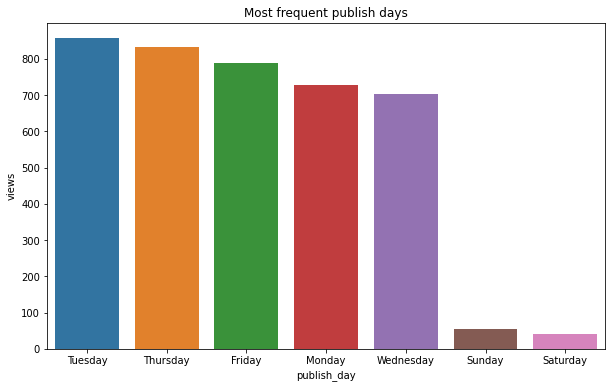

In [31]:
# Checking the day of the week having maximum publish date 
plt.figure(figsize=(10,6))
sns.barplot(x='publish_day',y='views',data=day_freq)
plt.title('Most frequent publish days')

* **Most videos are published on Tuesday followed by Thursday.**